#LABORATORIO 1 : Regresión Lineal


Estudiante: Sheila Rojas Vasquez


In [44]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np
import pandas as pd

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

Dataset: https://www.kaggle.com/datasets/gurdit559/canada-per-capita-income-single-variable-data-set





Descripción:
 El conjunto de datos contiene 2 columnas, año e ingreso per cápita. Agradecimientos El conjunto de datos es útil para predecir el ingreso per cápita de Canadá se ha extraído del sitio web: data.worldbank.org
 Objetivo: Predecir el ingreso per cápita de Canadá para un año usando regresión lineal

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
# Leer datos separados por una coma
data= np.genfromtxt('/content/drive/MyDrive/Colab Notebooks/canada_per_capita_income.csv', delimiter=',')
data
#data contiene 2 columnas, columna 0: año; columna 1: ingreso per cápita



array([[         nan,          nan],
       [ 1970.      ,  3399.299037],
       [ 1971.      ,  3768.297935],
       [ 1972.      ,  4251.175484],
       [ 1973.      ,  4804.463248],
       [ 1974.      ,  5576.514583],
       [ 1975.      ,  5998.144346],
       [ 1976.      ,  7062.131392],
       [ 1977.      ,  7100.12617 ],
       [ 1978.      ,  7247.967035],
       [ 1979.      ,  7602.912681],
       [ 1980.      ,  8355.96812 ],
       [ 1981.      ,  9434.390652],
       [ 1982.      ,  9619.438377],
       [ 1983.      , 10416.53659 ],
       [ 1984.      , 10790.32872 ],
       [ 1985.      , 11018.95585 ],
       [ 1986.      , 11482.89153 ],
       [ 1987.      , 12974.80662 ],
       [ 1988.      , 15080.28345 ],
       [ 1989.      , 16426.72548 ],
       [ 1990.      , 16838.6732  ],
       [ 1991.      , 17266.09769 ],
       [ 1992.      , 16412.08309 ],
       [ 1993.      , 15875.58673 ],
       [ 1994.      , 15755.82027 ],
       [ 1995.      , 16369.31725 ],
 

In [47]:
X, y = data[1:, 0], data[1:, 1]    #Fila,Columna subindices desde 1

m = y.size  # m = numero de ejemplos de entrenamiento
#X=X/1000

In [48]:
print(X)

[1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981.
 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993.
 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005.
 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016.]


In [49]:
# Normalizar los datos
X = (X - np.mean(X)) / np.std(X)

In [50]:
X

array([-1.6955825 , -1.62186152, -1.54814054, -1.47441956, -1.40069858,
       -1.32697761, -1.25325663, -1.17953565, -1.10581467, -1.03209369,
       -0.95837272, -0.88465174, -0.81093076, -0.73720978, -0.6634888 ,
       -0.58976782, -0.51604685, -0.44232587, -0.36860489, -0.29488391,
       -0.22116293, -0.14744196, -0.07372098,  0.        ,  0.07372098,
        0.14744196,  0.22116293,  0.29488391,  0.36860489,  0.44232587,
        0.51604685,  0.58976782,  0.6634888 ,  0.73720978,  0.81093076,
        0.88465174,  0.95837272,  1.03209369,  1.10581467,  1.17953565,
        1.25325663,  1.32697761,  1.40069858,  1.47441956,  1.54814054,
        1.62186152,  1.6955825 ])

In [51]:
#normalizar y
y=(y-np.mean(y))/np.std(y)

In [52]:
print(y)

[-1.30361891 -1.27262613 -1.23206851 -1.18559702 -1.12075125 -1.08533792
 -0.99597203 -0.99278079 -0.98036341 -0.95055098 -0.8873007  -0.79672234
 -0.7811799  -0.7142304  -0.68283503 -0.66363229 -0.62466562 -0.49935739
 -0.32251518 -0.20942545 -0.17482533 -0.1389253  -0.21065529 -0.25571644
 -0.26577581 -0.21424726 -0.18648726 -0.13517423 -0.19296761 -0.11247414
  0.00564804 -0.02677145  0.02620859  0.32078794  0.57105925  0.8632581
  1.16060551  1.446699    1.55605638  1.16202614  1.63786722  1.96662588
  1.99438884  1.99533059  1.85787217  1.36528666  1.28583107]


In [53]:
print(X.size) #N° de datos del dataset

47


### 1.1 Trazar los datos

In [54]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Ingreso per capita')
    pyplot.xlabel('Año')


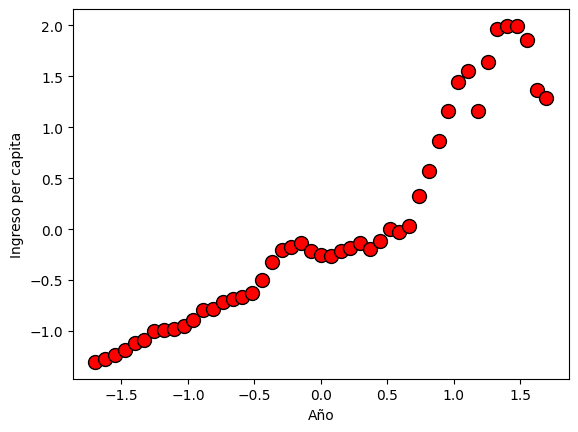

In [55]:
plotData(X, y)

# <a id="section2"></a>
### 1.2 Descenso por el gradiente



In [56]:
# Agrega una columna de unos a X
#La columna es de x0 que tiene el valor de 1
X = np.stack([np.ones(m), X], axis=1)

In [57]:
#visualizamos X
X

array([[ 1.        , -1.6955825 ],
       [ 1.        , -1.62186152],
       [ 1.        , -1.54814054],
       [ 1.        , -1.47441956],
       [ 1.        , -1.40069858],
       [ 1.        , -1.32697761],
       [ 1.        , -1.25325663],
       [ 1.        , -1.17953565],
       [ 1.        , -1.10581467],
       [ 1.        , -1.03209369],
       [ 1.        , -0.95837272],
       [ 1.        , -0.88465174],
       [ 1.        , -0.81093076],
       [ 1.        , -0.73720978],
       [ 1.        , -0.6634888 ],
       [ 1.        , -0.58976782],
       [ 1.        , -0.51604685],
       [ 1.        , -0.44232587],
       [ 1.        , -0.36860489],
       [ 1.        , -0.29488391],
       [ 1.        , -0.22116293],
       [ 1.        , -0.14744196],
       [ 1.        , -0.07372098],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.07372098],
       [ 1.        ,  0.14744196],
       [ 1.        ,  0.22116293],
       [ 1.        ,  0.29488391],
       [ 1.        ,

<a id="section2"></a>
#### 1.2.3 Cálculo del costo $J(\theta)$

In [58]:
#Definimos la función de costo
def computeCost(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento

    h = np.dot(X, theta) #producto de x y theta también puede ser  theta*X
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$.

In [60]:
#Prueba de la función costo con theta (0,0)
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('Con theta = [0, 0] \n Costo calculado = %.2f' % J)

# pruebas adicionales de la función de costes
J = computeCost(X, y, theta=np.array([-1, 2]))
print('Con theta = [-1, 2]\n Costo calculado = %.2f' % J)


Con theta = [0, 0] 
 Costo calculado = 0.50
Con theta = [-1, 2]
 Costo calculado = 1.11


<a id="section3"></a>
#### 1.2.4 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso.

<div class="alert alert-box alert-warning">
**Vectores y matrices en `numpy`** - Importantes notas para implementación
Un vector en `numpy` es un array de una diemension, por ejemplo `np.array([1, 2, 3])` es un vector. Una matriz en `numpy` is un arreglo de dos dimensiones, por ejemplo  `np.array([[1, 2, 3], [4, 5, 6]])`. Sin embargo, lo siguiente todavía se considera una matriz `np.array ([[1, 2, 3]])` ya que tiene dos dimensiones, incluso si tiene una forma de 1x3 (que parece un vector).

In [61]:
y

array([-1.30361891, -1.27262613, -1.23206851, -1.18559702, -1.12075125,
       -1.08533792, -0.99597203, -0.99278079, -0.98036341, -0.95055098,
       -0.8873007 , -0.79672234, -0.7811799 , -0.7142304 , -0.68283503,
       -0.66363229, -0.62466562, -0.49935739, -0.32251518, -0.20942545,
       -0.17482533, -0.1389253 , -0.21065529, -0.25571644, -0.26577581,
       -0.21424726, -0.18648726, -0.13517423, -0.19296761, -0.11247414,
        0.00564804, -0.02677145,  0.02620859,  0.32078794,  0.57105925,
        0.8632581 ,  1.16060551,  1.446699  ,  1.55605638,  1.16202614,
        1.63786722,  1.96662588,  1.99438884,  1.99533059,  1.85787217,
        1.36528666,  1.28583107])

In [62]:
y.shape[0]

47

In [63]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # hace una copia de theta, para evitar cambiar la matriz original,
    # ya que las matrices numpy se pasan por referencia a las funciones

    #alpha =0.001 0.005
    theta = theta.copy() #.copy -> evitar las referencias

    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))

    return theta, J_history

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.01.

In [65]:
# inicializa los parametros de ajuste
theta = np.zeros(2)

# configuraciones para el descenso por el gradiente
iterations = 1000
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
#print('Valores theta esperados (aproximadamente): [-3.6303, 1.1664]')
J_history[-1]

Theta encontrada por descenso gradiente: 0.0000, 0.9438


0.05454154185171005

In [66]:
J_history

[0.49113537666632756,
 0.48244715933699506,
 0.47393183753251644,
 0.46558597063194695,
 0.45740618648269865,
 0.4493891800380204,
 0.4415317120215915,
 0.4338306076186893,
 0.42628275519340497,
 0.41888510503138365,
 0.4116346681075866,
 0.4045285148785732,
 0.39756377409881716,
 0.3907376316605782,
 0.3840473294568602,
 0.3774901642669963,
 0.3710634866644106,
 0.3647646999461164,
 0.3585912590835162,
 0.3525406696940817,
 0.346610487033497,
 0.3407983150078579,
 0.33510180520552907,
 0.3295186559482666,
 0.32404661136122365,
 0.3186834604614628,
 0.3134270362646072,
 0.308275214909269,
 0.30322591479890215,
 0.2982770957607315,
 0.2934267582214205,
 0.2886729423991418,
 0.2840137275117264,
 0.2794472310005705,
 0.27497160776998675,
 0.27058504944169154,
 0.2662857836241294,
 0.26207207319633674,
 0.25794221560605723,
 0.2538945421818242,
 0.24992741745873343,
 0.24603923851763213,
 0.24222843433745883,
 0.23849346516047085,
 0.234832821870105,
 0.23124502538121747,
 0.22772862604245

Se utilizan los parametros finales para grafical la linea.

In [67]:
X

array([[ 1.        , -1.6955825 ],
       [ 1.        , -1.62186152],
       [ 1.        , -1.54814054],
       [ 1.        , -1.47441956],
       [ 1.        , -1.40069858],
       [ 1.        , -1.32697761],
       [ 1.        , -1.25325663],
       [ 1.        , -1.17953565],
       [ 1.        , -1.10581467],
       [ 1.        , -1.03209369],
       [ 1.        , -0.95837272],
       [ 1.        , -0.88465174],
       [ 1.        , -0.81093076],
       [ 1.        , -0.73720978],
       [ 1.        , -0.6634888 ],
       [ 1.        , -0.58976782],
       [ 1.        , -0.51604685],
       [ 1.        , -0.44232587],
       [ 1.        , -0.36860489],
       [ 1.        , -0.29488391],
       [ 1.        , -0.22116293],
       [ 1.        , -0.14744196],
       [ 1.        , -0.07372098],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.07372098],
       [ 1.        ,  0.14744196],
       [ 1.        ,  0.22116293],
       [ 1.        ,  0.29488391],
       [ 1.        ,

In [68]:
a=np.dot(X, theta)
a

array([-1.60036402e+00, -1.53078297e+00, -1.46120193e+00, -1.39162088e+00,
       -1.32203984e+00, -1.25245880e+00, -1.18287775e+00, -1.11329671e+00,
       -1.04371566e+00, -9.74134619e-01, -9.04553575e-01, -8.34972531e-01,
       -7.65391486e-01, -6.95810442e-01, -6.26229398e-01, -5.56648354e-01,
       -4.87067310e-01, -4.17486265e-01, -3.47905221e-01, -2.78324177e-01,
       -2.08743133e-01, -1.39162088e-01, -6.95810442e-02,  1.10809707e-16,
        6.95810442e-02,  1.39162088e-01,  2.08743133e-01,  2.78324177e-01,
        3.47905221e-01,  4.17486265e-01,  4.87067310e-01,  5.56648354e-01,
        6.26229398e-01,  6.95810442e-01,  7.65391486e-01,  8.34972531e-01,
        9.04553575e-01,  9.74134619e-01,  1.04371566e+00,  1.11329671e+00,
        1.18287775e+00,  1.25245880e+00,  1.32203984e+00,  1.39162088e+00,
        1.46120193e+00,  1.53078297e+00,  1.60036402e+00])

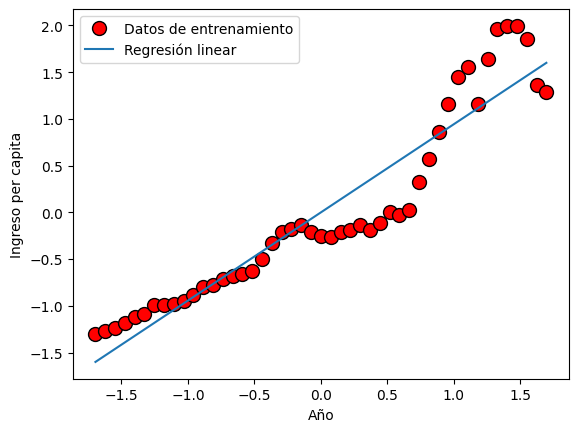

In [69]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);

Los valores finales de $\theta$ se utilizaran para realizar predicciones.

In [72]:
#Predicción año 2020
year = 2020
# Normalizar el año 2020 (usando la misma media y desviación estándar que usaste para normalizar los datos de entrenamiento)
X_norm = (year - np.mean(data[1:, 0])) / np.std(data[1:, 0])
X_norm
#Se obtiene y predecida y normalizada
y_pred_norm = theta[0] + theta[1] * X_norm
#Calculo de y predecida
y_pred = y_pred_norm * np.std(data[1:, 1]) + np.mean(data[1:, 1])

print(f"La predicción para el año {year} es: {y_pred}")

La predicción para el año 2020 es: 41287.72841590764


In [73]:
#Predicción año 2025
year = 2025
# Normalizar el año 2025
X_norm = (year - np.mean(data[1:, 0])) / np.std(data[1:, 0])
X_norm
#Se obtiene y predecida y normalizada
y_pred_norm = theta[0] + theta[1] * X_norm
#Calculo de y predecida
y_pred = y_pred_norm * np.std(data[1:, 1]) + np.mean(data[1:, 1])

print(f"La predicción para el año {year} es: {y_pred}")

La predicción para el año 2025 es: 45429.87496266752


### 1.4 Visualizar $J(\theta)$

Para comprender mejor la función de costo $J(\theta)$, se graficará la funcion de costo en 2 dimenciones con los valores de $\theta_0$ y $\theta_1$.

El proposito de graficar el costo para observar como $J(\theta)$ varia con cambios en $\theta_0$ y $\theta_1$. La función de costo  $J(\theta)$ tiene forma de una cuenca con un minimo global. (Esto es mas facil observar en los contornos de una superficie 3D). El minimo es el punto optimo para $\theta_0$ y $\theta_1$, en cada paso del descenso por el gradiente se mueve mas cerca a este punto.

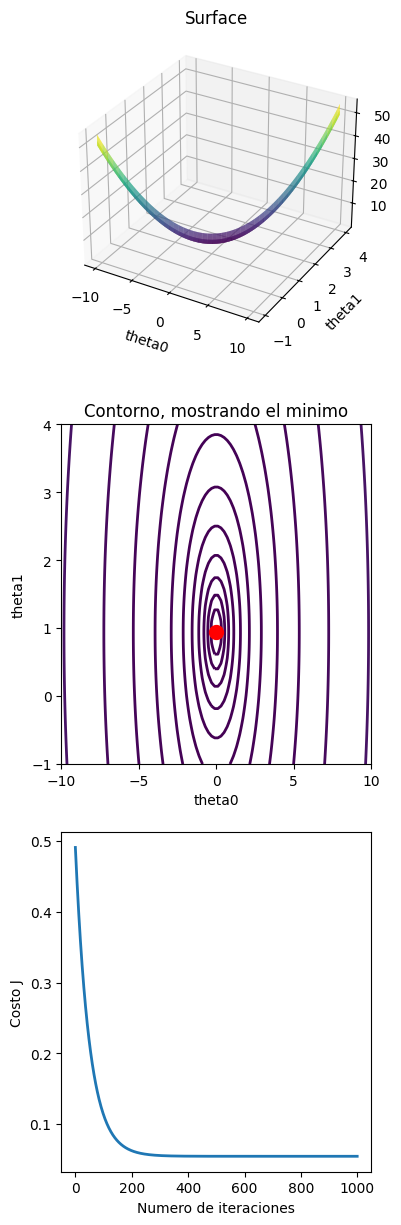

In [74]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])

# Debido a la forma en que funcionan las cuadrículas en el comando surf,
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = pyplot.figure(figsize=(4, 15))
ax = fig.add_subplot(311, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# graficar contornos
# Grafica J_vals como 15 contours spaciados logaritmicamente entre 0.01 y 100
ax = pyplot.subplot(312)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando el minimo')


# Grafica la convergencia del costo
ax = pyplot.subplot(313)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

pass